### **Reading Combined Flilghts 2019 File**

In [14]:
import pandas as pd

file_path = r"C:\Users\Hites\OneDrive\Desktop\CDAC 2024\Project\Dataset\Combined_Flights_2022.csv"

df = pd.read_csv(file_path)

print(df.head())
print(df.info())

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

### **Total Rows in 2019 DataSet**

In [3]:
print("Total in 2019 Dataset rows:", len(df))

Total in 2019 Dataset rows: 6311871


### **Null Values in Dataset**

In [4]:
# Find the number of null values in each column
null_values = df.isnull().sum()

# Display the null values count for each column
print(null_values)

FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              126001
ArrivalDelayGroups    126001
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings         2
Length: 61, dtype: int64


### Show Percentage of Missing Values

In [5]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

DepTime                 1.716211
DepDelayMinutes         1.717605
DepDelay                1.717605
ArrTime                 1.780898
ArrDelayMinutes         1.996254
AirTime                 1.996254
CRSElapsedTime          0.000016
ActualElapsedTime       1.996254
Tail_Number             0.369193
DepDel15                1.717605
DepartureDelayGroups    1.717605
TaxiOut                 1.748341
WheelsOff               1.748341
WheelsOn                1.781168
TaxiIn                  1.781168
ArrDelay                1.996254
ArrDel15                1.996254
ArrivalDelayGroups      1.996254
DivAirportLandings      0.000032
dtype: float64


In [6]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]

print(null_columns)


DepTime                 108325
DepDelayMinutes         108413
DepDelay                108413
ArrTime                 112408
ArrDelayMinutes         126001
AirTime                 126001
CRSElapsedTime               1
ActualElapsedTime       126001
Tail_Number              23303
DepDel15                108413
DepartureDelayGroups    108413
TaxiOut                 110353
WheelsOff               110353
WheelsOn                112425
TaxiIn                  112425
ArrDelay                126001
ArrDel15                126001
ArrivalDelayGroups      126001
DivAirportLandings           2
dtype: int64


### **Classify the Columns According to their data types**

In [7]:
# Identify time-series columns (Date columns)
time_series_cols = [col for col in df.columns if "date" in col.lower()]

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns (excluding numerical and time-series)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Identify boolean columns (True/False)
boolean_cols = [col for col in df.columns if df[col].dropna().isin([True, False]).all()]

# Print results
print("Time-Series Columns:", time_series_cols)
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Boolean Columns:", boolean_cols)

Time-Series Columns: ['FlightDate']
Numerical Columns: ['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings']
Categorical Columns: ['FlightDate', 'Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'IATA_Code_Marketing_Airline', 'Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName', '

## **-: Handling NUll Values :-**

### 1. Drop Columns with Too Many Nulls (If >50%)


In [8]:
df = df.dropna(thresh=len(df) * 0.5, axis=1)

### 2. Handle Missing Values Based on Data Type
🔹 Numerical Columns

Use Mean if no outliers (normal distribution).

Use Median if outliers exist (skewed distribution). 

In [9]:
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        if df[col].skew() > 1 or df[col].skew() < -1:  # Check for skewness
            df[col].fillna(df[col].median(), inplace=True)  # Use median
        else:
            df[col].fillna(df[col].mean(), inplace=True)  # Use mean

C:\Users\Hites\AppData\Local\Temp\ipykernel_18108\2454565797.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Use mean
C:\Users\Hites\AppData\Local\Temp\ipykernel_18108\2454565797.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


🔹 Categorical Columns

Use Mode (most frequent value).

Use "Unknown" if mode isn't appropriate.

### 🔹 Boolean Columns (Like Cancelled, Diverted, Delayed)
Fill with False (assuming missing means no event occurred).

In [10]:
boolean_cols = ["Cancelled", "Diverted", "DepDel15", "ArrDel15", "Delayed"]

for col in boolean_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(False, inplace=True)

### 🔹 Time-Series Columns (Like FlightDate)
Use Forward & Backward Fill to propagate values.

In [11]:
if "FlightDate" in df.columns:
    df.sort_values(by="FlightDate", inplace=True)
    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)

C:\Users\Hites\AppData\Local\Temp\ipykernel_18108\411833513.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
C:\Users\Hites\AppData\Local\Temp\ipykernel_18108\411833513.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


### 🔹 3. Drop Remaining Rows (if very few nulls left)

In [12]:
df.dropna(inplace=True)

### 🔹 Final Check For Null Vlaues

In [13]:
print("Missing Values After Handling:")
print(df.isnull().sum())

Missing Values After Handling:
FlightDate            0
Airline               0
Origin                0
Dest                  0
Cancelled             0
                     ..
ArrDel15              0
ArrivalDelayGroups    0
ArrTimeBlk            0
DistanceGroup         0
DivAirportLandings    0
Length: 61, dtype: int64


In [14]:
from IPython.display import display

display(df)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
2717229,2021-01-01,American Airlines Inc.,SAN,ORD,False,False,620,611.0,0.0,-9.0,...,635.0,1214.0,6.0,1225,-5.0,0.0,-1.0,1200-1259,7,0.0
2868498,2021-01-01,SkyWest Airlines Inc.,SFO,SMF,False,False,1305,1258.0,0.0,-7.0,...,1312.0,1337.0,5.0,1358,-16.0,0.0,-2.0,1300-1359,1,0.0
2868500,2021-01-01,SkyWest Airlines Inc.,MFR,SFO,False,False,1615,1608.0,0.0,-7.0,...,1616.0,1718.0,8.0,1738,-12.0,0.0,-1.0,1700-1759,2,0.0
2868502,2021-01-01,SkyWest Airlines Inc.,SFO,ONT,False,False,1900,1859.0,0.0,-1.0,...,1912.0,2008.0,4.0,2026,-14.0,0.0,-1.0,2000-2059,2,0.0
2868504,2021-01-01,SkyWest Airlines Inc.,DRO,DEN,False,False,1140,1129.0,0.0,-11.0,...,1146.0,1230.0,4.0,1259,-25.0,0.0,-2.0,1200-1259,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706935,2021-12-31,Capital Cargo International,CLT,LYH,False,False,901,855.0,0.0,-6.0,...,925.0,1002.0,4.0,1017,-11.0,0.0,-1.0,1000-1059,1,0.0
622018,2021-12-31,Endeavor Air Inc.,ATL,CSG,False,False,2110,2106.0,0.0,-4.0,...,2120.0,2141.0,2.0,2154,-11.0,0.0,-1.0,2100-2159,1,0.0
706966,2021-12-31,Capital Cargo International,LYH,CLT,False,False,1042,1032.0,0.0,-10.0,...,1051.0,1125.0,27.0,1207,-15.0,0.0,-1.0,1200-1259,1,0.0
865848,2021-12-31,Envoy Air,CVG,ORD,False,False,649,648.0,0.0,-1.0,...,701.0,651.0,13.0,722,-18.0,0.0,-2.0,0700-0759,2,0.0


### Statistical summary of the DataFrame:
### Descriptive Analysis

In [15]:
df.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,...,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06
mean,1.323953e+03,1.326878e+03,1.254213e+01,9.271366e+00,1.476758e+03,1.227916e+01,1.102394e+02,1.405049e+02,1.341090e+02,7.955762e+02,...,1.615662e+01,1.349829e+03,1.471500e+03,7.653762e+00,1.498272e+03,3.084825e+00,1.692143e-01,-3.294863e-01,3.653994e+00,3.338471e-03
std,4.741972e+02,4.826374e+02,4.698394e+01,4.798430e+01,5.091754e+02,4.631191e+01,6.823466e+01,7.031368e+01,6.957132e+01,5.832931e+02,...,8.513612e+00,4.837072e+02,5.051220e+02,6.322337e+00,4.946565e+02,4.964116e+01,3.749411e-01,2.245906e+00,2.281563e+00,1.046246e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.050000e+02,1.000000e+00,0.000000e+00,8.000000e+00,-2.920000e+02,1.400000e+01,3.100000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.070000e+02,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,9.200000e+02,9.270000e+02,0.000000e+00,-6.000000e+00,1.110000e+03,0.000000e+00,6.100000e+01,9.000000e+01,8.400000e+01,3.700000e+02,...,1.100000e+01,9.420000e+02,1.106000e+03,4.000000e+00,1.118000e+03,-1.600000e+01,0.000000e+00,-2.000000e+00,2.000000e+00,0.000000e+00
50%,1.315000e+03,1.326878e+03,0.000000e+00,-2.000000e+00,1.500000e+03,0.000000e+00,9.400000e+01,1.240000e+02,1.180000e+02,6.460000e+02,...,1.400000e+01,1.342000e+03,1.471500e+03,6.000000e+00,1.520000e+03,-7.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,0.000000e+00
75%,1.723000e+03,1.725000e+03,5.000000e+00,5.000000e+00,1.905000e+03,5.000000e+00,1.390000e+02,1.700000e+02,1.640000e+02,1.033000e+03,...,1.900000e+01,1.739000e+03,1.859000e+03,9.000000e+00,1.914000e+03,5.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,3.095000e+03,3.095000e+03,2.400000e+03,3.089000e+03,7.110000e+02,1.312000e+03,7.940000e+02,5.812000e+03,...,2.560000e+02,2.400000e+03,2.400000e+03,2.510000e+02,2.400000e+03,3.089000e+03,1.000000e+00,1.200000e+01,1.100000e+01,9.000000e+00


### Categorical Columns Analysis

In [16]:
print("\nCategorical columns analysis:")
print(df.select_dtypes(include=['object']).nunique())

## It is good to do One_hot_encoding  with this catagorical columns


Categorical columns analysis:
FlightDate                                  365
Airline                                      22
Origin                                      380
Dest                                        380
Marketing_Airline_Network                    10
Operated_or_Branded_Code_Share_Partners      15
IATA_Code_Marketing_Airline                  10
Operating_Airline                            22
IATA_Code_Operating_Airline                  22
Tail_Number                                5785
OriginCityName                              374
OriginState                                  53
OriginStateName                              53
DestCityName                                374
DestState                                    53
DestStateName                                53
DepTimeBlk                                   19
ArrTimeBlk                                   19
dtype: int64


## Bar plot for delayed vs non-delayed flights


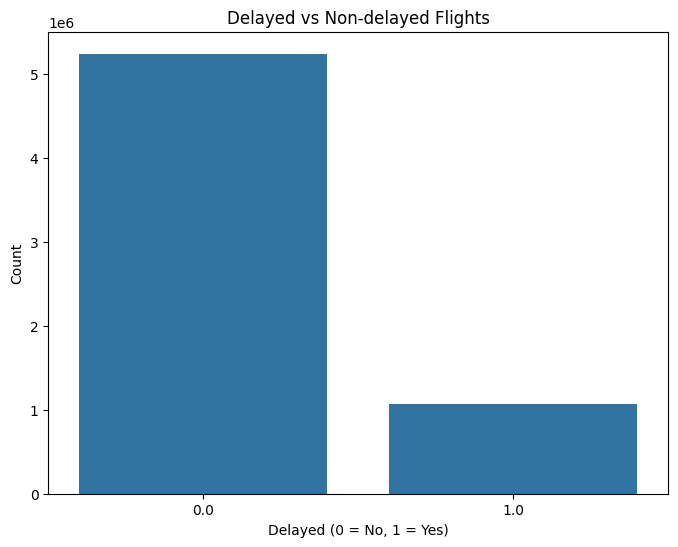

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='ArrDel15', data=df)
plt.title('Delayed vs Non-delayed Flights')
plt.xlabel('Delayed (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## **Calculate Total Flights and Delayed Flights in Year**


In [18]:
df_yearly = df.groupby('Year').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per year
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per year
).reset_index()

# Step 2: Calculate Delayed Percentage per Year
df_yearly['delayed_percentage'] = (df_yearly['delayed_flights'] / df_yearly['total_flights']) * 100

# Step 3: Display the results
print(df_yearly)


   Year  total_flights  delayed_flights  delayed_percentage
0  2021        6311871          1068059           16.921433


## Delayed percentage per month

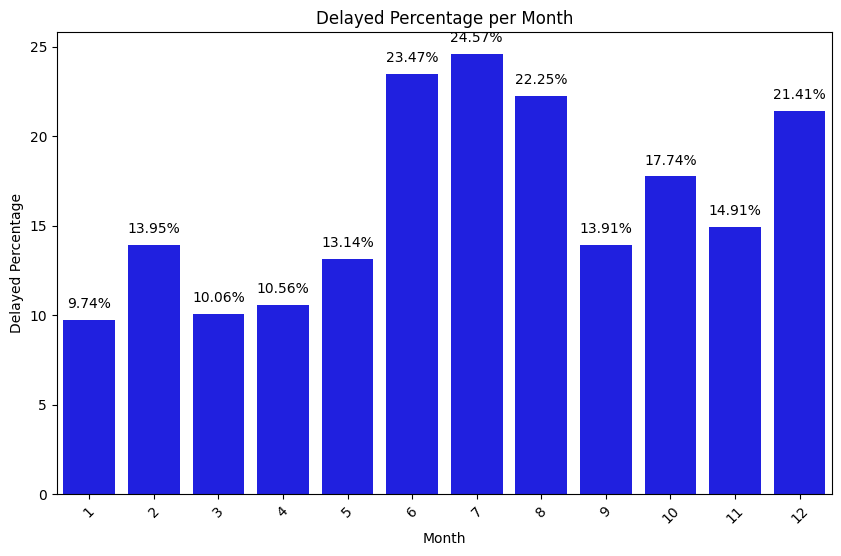

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Month
df_monthly = df.groupby('Month').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per month
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per month
).reset_index()

# Step 2: Calculate Delayed Percentage per Month
df_monthly['delayed_percentage'] = (df_monthly['delayed_flights'] / df_monthly['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='delayed_percentage', data=df_monthly, color='blue')  # Single solid color

# Add data labels
for index, row in df_monthly.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Month")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Month")
plt.xticks(rotation=45)
plt.show()


## Total Flights and Delayed Flights Per Day of the Week

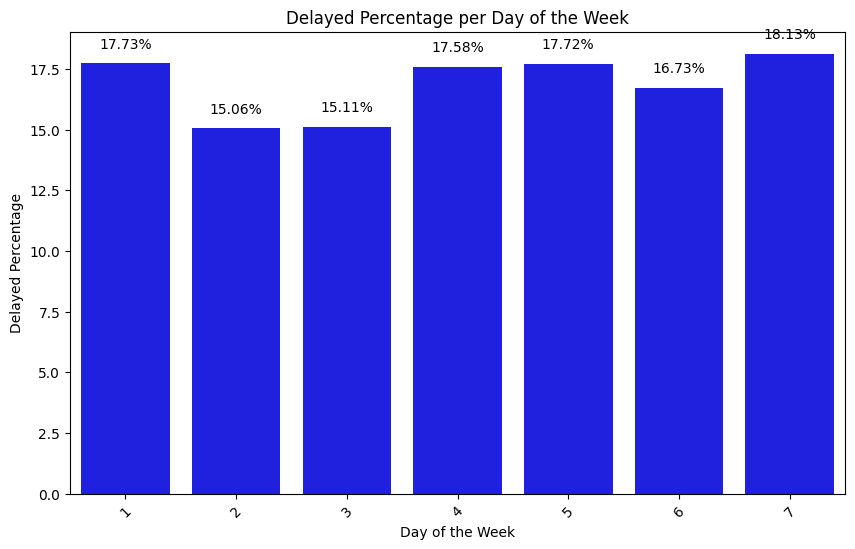

In [20]:
# Step 1: Calculate Total Flights and Delayed Flights Per Day of the Week
df_weekday = df.groupby('DayOfWeek').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per day of the week
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per day of the week
).reset_index()

# Step 2: Calculate Delayed Percentage per Day of the Week
df_weekday['delayed_percentage'] = (df_weekday['delayed_flights'] / df_weekday['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='delayed_percentage', data=df_weekday, color='blue')  # Single solid color

# Add data labels
for index, row in df_weekday.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Day of the Week")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Day of the Week")
plt.xticks(rotation=45)
plt.show()


## **Airline-Wise Flight Delay Analysis**

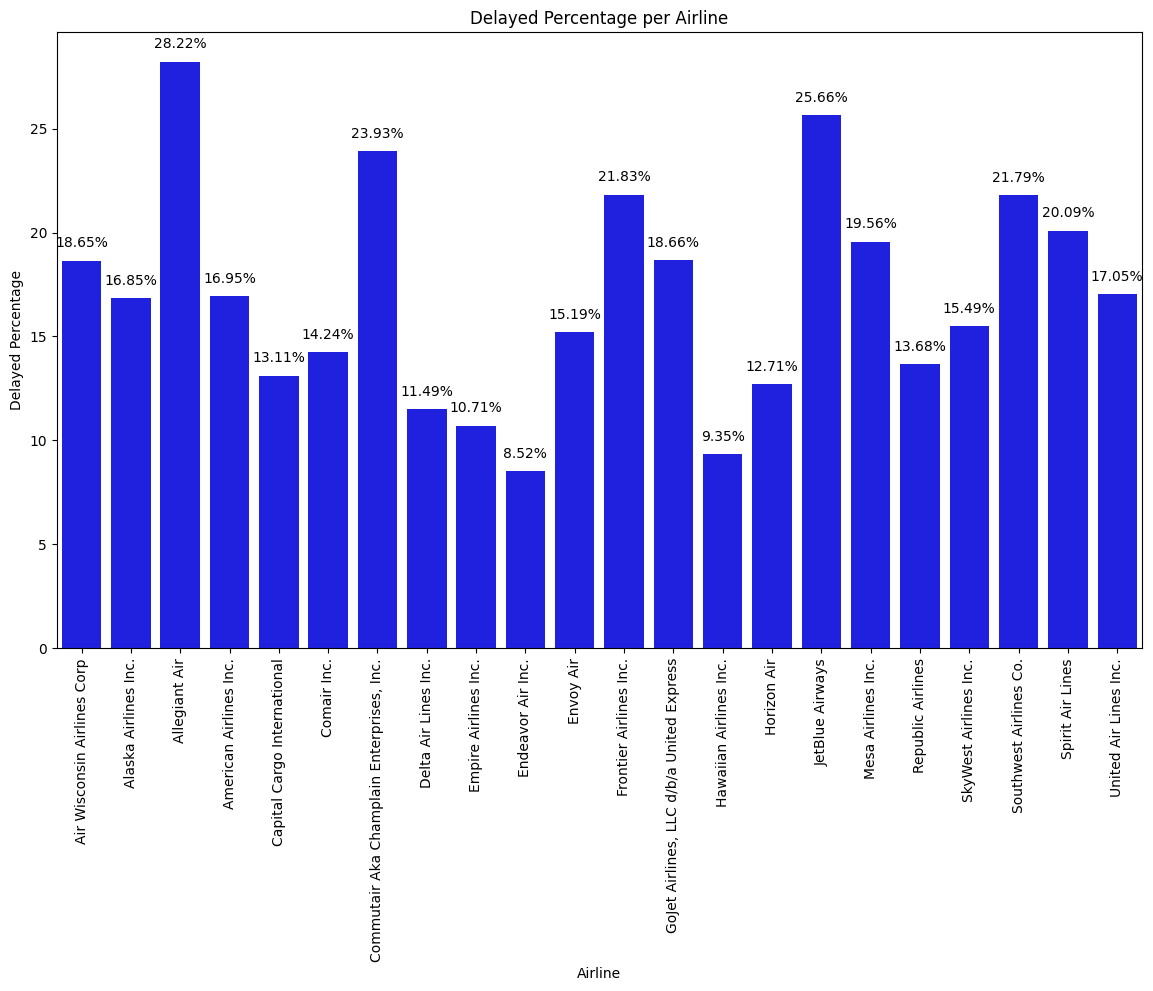

In [21]:
# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(14, 8))
sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, color='blue')  # Single solid color

# Add data labels
for index, row in df_airline.iterrows():
    plt.text(row.name, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Airline-Wise Delay Analysis with Total and Delayed Flights**

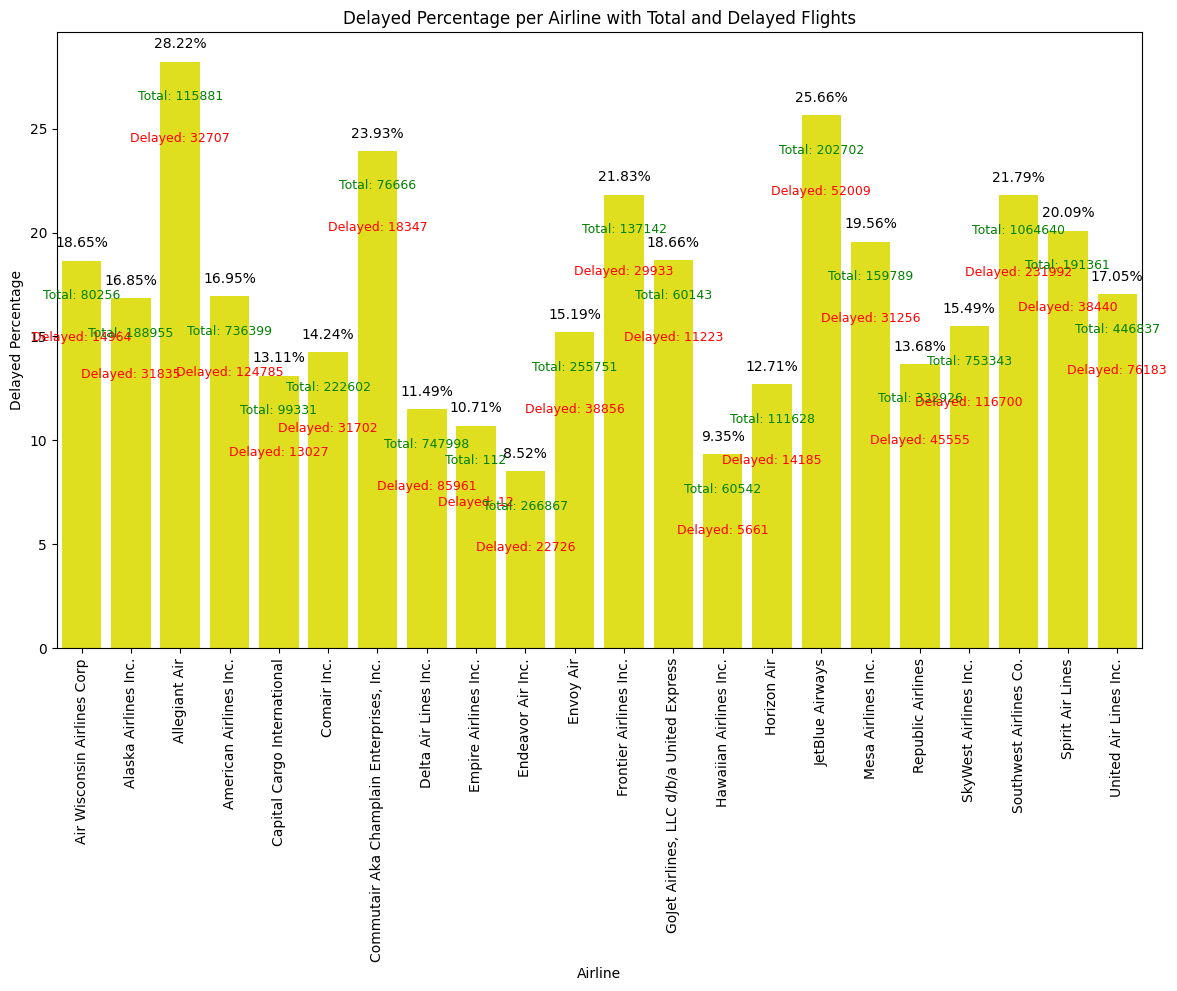

In [22]:
# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(14, 8))
sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, color='yellow')  # Single solid color

# Add data labels for Delayed Percentage, Total Flights, and Delayed Flights
for index, row in df_airline.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size
    
    # Display total flights and delayed flights next to the bars
    plt.text(index, row['delayed_percentage'] - 2,  # Position for total flights label (adjust position to fit)
             f'Total: {row["total_flights"]}',  # Display total flights
             ha='center', va='bottom', fontsize=9, color='green')  # Color for total flights
    
    plt.text(index, row['delayed_percentage'] - 4,  # Position for delayed flights label (adjust position to fit)
             f'Delayed: {row["delayed_flights"]}',  # Display delayed flights
             ha='center', va='bottom', fontsize=9, color='red')  # Color for delayed flights

plt.xlabel("Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Airline with Total and Delayed Flights")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Origin Airport-Wise Delay Analysis: Identifying Airports with Highest Delays**

In [23]:
# Step 1: Calculate Total Flights and Delayed Flights Per Origin
df_origin = df.groupby('Origin').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per origin
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per origin
).reset_index()

# Step 2: Calculate Delayed Percentage per Origin
df_origin['delayed_percentage'] = (df_origin['delayed_flights'] / df_origin['total_flights']) * 100

# Display all rows in tabular form sorted by delayed_percentage in descending order
pd.set_option('display.max_rows', None)  # Show all rows
df_origin_display = df_origin[['Origin', 'total_flights', 'delayed_flights', 'delayed_percentage']].sort_values(by='delayed_percentage', ascending=False)

print(df_origin_display)


    Origin  total_flights  delayed_flights  delayed_percentage
284    PPG              6                6          100.000000
9      ADK            104               50           48.076923
38     BIH             39               16           41.025641
253    OGD            101               36           35.643564
176    ILG            118               42           35.593220
205    LCK           1157              409           35.350043
157    HGR            185               65           35.135135
54     BRW            362              126           34.806630
44     BLV           1318              456           34.597876
290    PSM            337              109           32.344214
32     BET            698              222           31.805158
368    USA           1262              398           31.537242
322    SCK            666              210           31.531532
51     BQN           1592              482           30.276382
301    RFD            762              227           29

## **List of Distinct Operating Airlines in the Dataset**

In [24]:
# Find distinct operating airlines
distinct_airlines = df['Operating_Airline'].unique()

# Print the distinct operating airlines
print(distinct_airlines)

['AA' 'OO' '9E' 'WN' 'OH' 'MQ' 'F9' 'G4' 'HA' 'EM' 'NK' 'UA' 'QX' 'ZW'
 'C5' 'G7' 'YV' 'DL' 'B6' 'YX' 'PT' 'AS']


## **Delayed Percentage per Operating Airline**

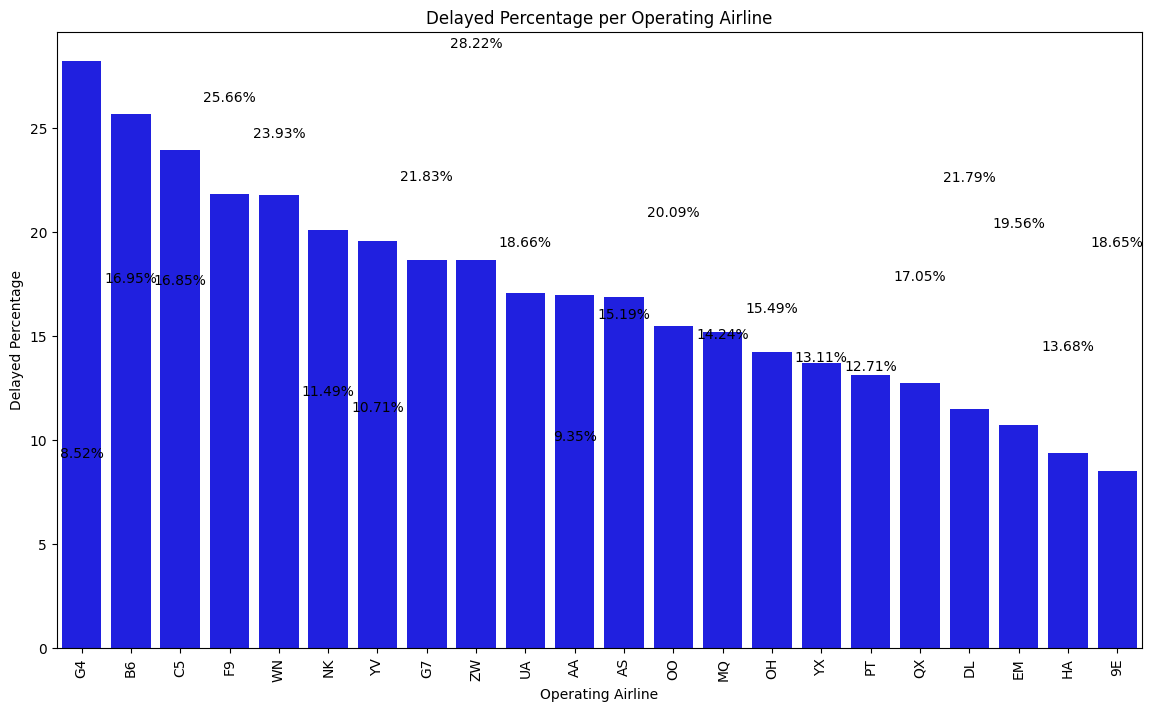

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Operating Airline
df_operating_airline = df.groupby('Operating_Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per operating airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per operating airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Operating Airline
df_operating_airline['delayed_percentage'] = (df_operating_airline['delayed_flights'] / df_operating_airline['total_flights']) * 100

# Step 3: Sort the values by delayed percentage
df_operating_airline = df_operating_airline.sort_values(by='delayed_percentage', ascending=False)

# Step 4: Create a Bar Plot with Delayed Percentage
plt.figure(figsize=(14, 8))
sns.barplot(x='Operating_Airline', y='delayed_percentage', data=df_operating_airline, color='blue')  # Solid color

# Add data labels for Delayed Percentage
for index, row in df_operating_airline.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Operating Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Operating Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Flight Delay Analysis by Distance Group**

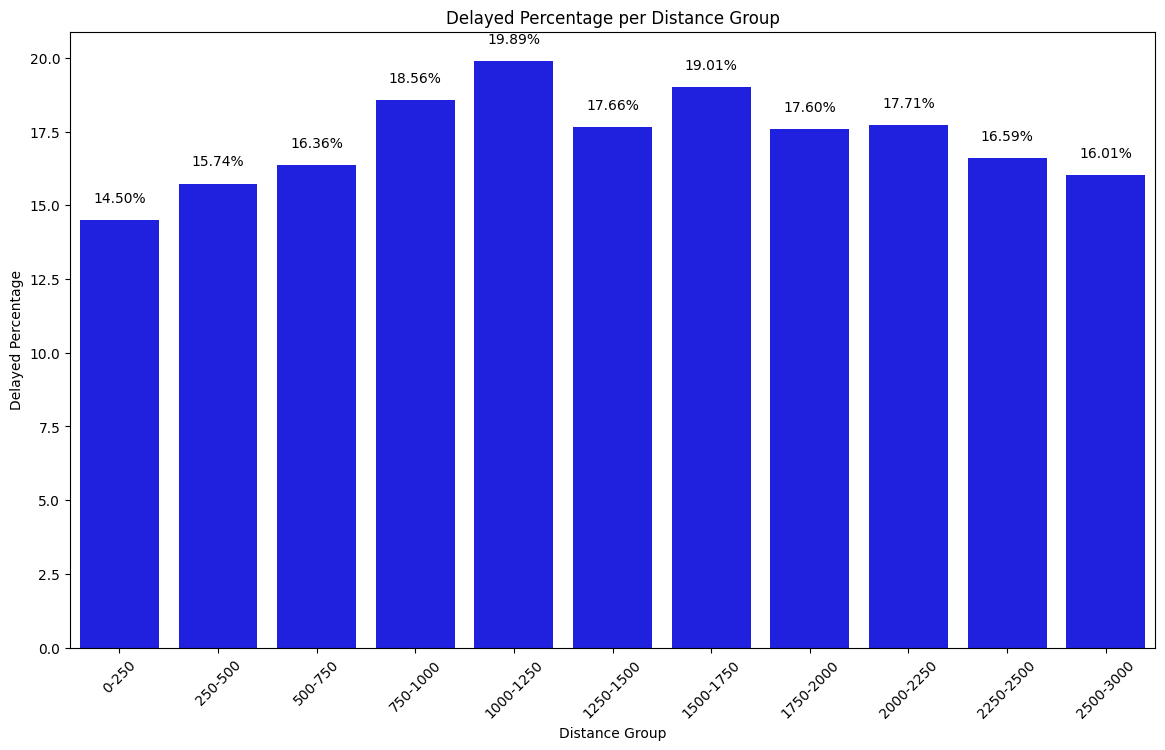

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Calculate Total Flights and Delayed Flights Per Distance Group
df_distance_group = df.groupby('DistanceGroup').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per distance group
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per distance group
).reset_index()

# Step 2: Calculate Delayed Percentage per Distance Group
df_distance_group['delayed_percentage'] = (df_distance_group['delayed_flights'] / df_distance_group['total_flights']) * 100

# Step 3: Map numerical distance groups to actual range labels
distance_ranges = {
    1: '0-250',
    2: '250-500',
    3: '500-750',
    4: '750-1000',
    5: '1000-1250',
    6: '1250-1500',
    7: '1500-1750',
    8: '1750-2000',
    9: '2000-2250',
    10: '2250-2500',
    11: '2500-3000'
}

df_distance_group['DistanceRange'] = df_distance_group['DistanceGroup'].map(distance_ranges)

# Step 4: Sort the values by delayed percentage
df_distance_group = df_distance_group.sort_values(by='delayed_percentage', ascending=False)

# Step 5: Convert 'DistanceRange' to a categorical column with correct order
df_distance_group['DistanceRange'] = pd.Categorical(df_distance_group['DistanceRange'], 
                                                     categories=distance_ranges.values(), 
                                                     ordered=True)

# Step 6: Create a Bar Plot with Delayed Percentage using the actual distance range labels
plt.figure(figsize=(14, 8))
sns.barplot(x='DistanceRange', y='delayed_percentage', data=df_distance_group, color='blue')  # Solid color

# Add data labels for Delayed Percentage
for index, row in df_distance_group.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

# Labeling axes and title
plt.xlabel("Distance Group")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Distance Group")
plt.xticks(rotation=45)  # Rotate distance group labels for better readability
plt.show()


## **Displays the Top 10 destination cities with the highest delay percentages**

In [27]:
# Group by destination and count the number of delayed flights
delayed_by_dest = df.groupby('DestCityName')['ArrDel15'].sum().reset_index()

# Count total flights per destination
total_flights_by_dest = df.groupby('DestCityName')['ArrDel15'].count().reset_index()

# Merge both dataframes
delayed_by_dest = delayed_by_dest.merge(total_flights_by_dest, on='DestCityName', suffixes=('_delayed', '_total'))

# Calculate percentage of delayed flights
delayed_by_dest['Delay_Percentage'] = (delayed_by_dest['ArrDel15_delayed'] / delayed_by_dest['ArrDel15_total']) * 100

# Sort the cities by percentage of delayed flights
delayed_by_dest_sorted = delayed_by_dest.sort_values(by='Delay_Percentage', ascending=False)

# Print the top 10 cities with the highest percentage of delayed flights
print(delayed_by_dest_sorted[['DestCityName', 'Delay_Percentage']].head(10))


                 DestCityName  Delay_Percentage
257             Pago Pago, TT         83.333333
37                 Bishop, CA         46.153846
3               Aguadilla, PR         34.649123
281           Punta Gorda, FL         33.305495
92              Dickinson, ND         32.363636
332        St. Petersburg, FL         30.647275
308               Sanford, FL         30.626354
276  Presque Isle/Houlton, ME         29.347826
18                  Aspen, CO         27.460613
69                   Cody, WY         27.194656


 ## **Correlation of Features with Departure Delay (DepDelayMinutes and ArrDelayMinutes)**

                      DepDelayMinutes  ArrDelayMinutes
DepDelayMinutes              1.000000         0.974828
DepDelay                     0.997348         0.970844
ArrDelayMinutes              0.974828         1.000000
ArrDelay                     0.956759         0.982042
DepartureDelayGroups         0.811829         0.774422
ArrivalDelayGroups           0.758891         0.788665
DepDel15                     0.535951         0.486480
ArrDel15                     0.494965         0.532465
DepTime                      0.111900         0.100743
WheelsOff                    0.105043         0.097015


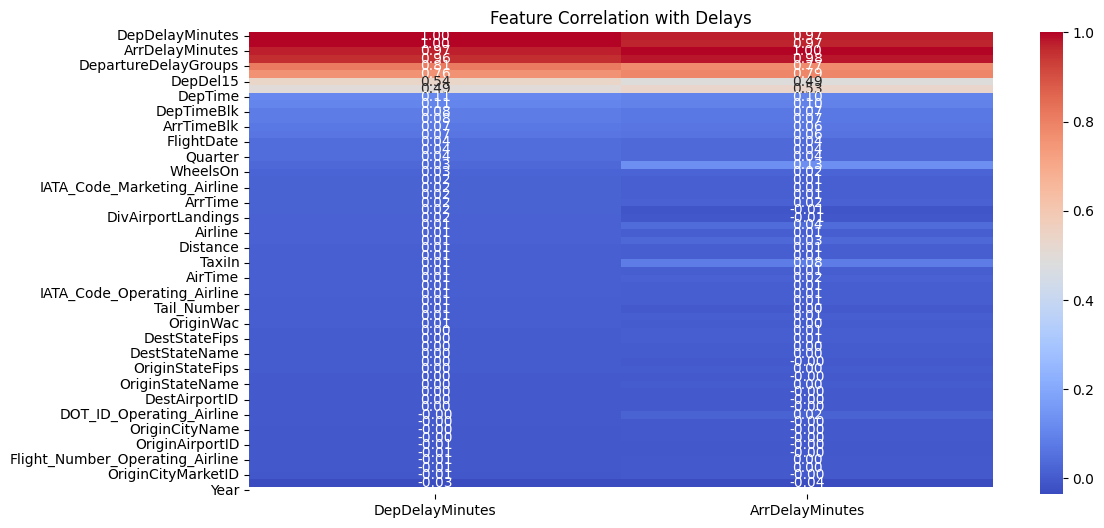

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Selecting numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encoding categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlations of delay columns (Using Correct Columns)
delay_correlations = correlation_matrix[['DepDelayMinutes', 'ArrDelayMinutes']].sort_values(
    by=['DepDelayMinutes', 'ArrDelayMinutes'], ascending=False
)

# Display top correlated features
print(delay_correlations.head(10))

# Plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(delay_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Delays")
plt.show()


## **Correlation of Features with Flight Delay Status (ArrDel15)**

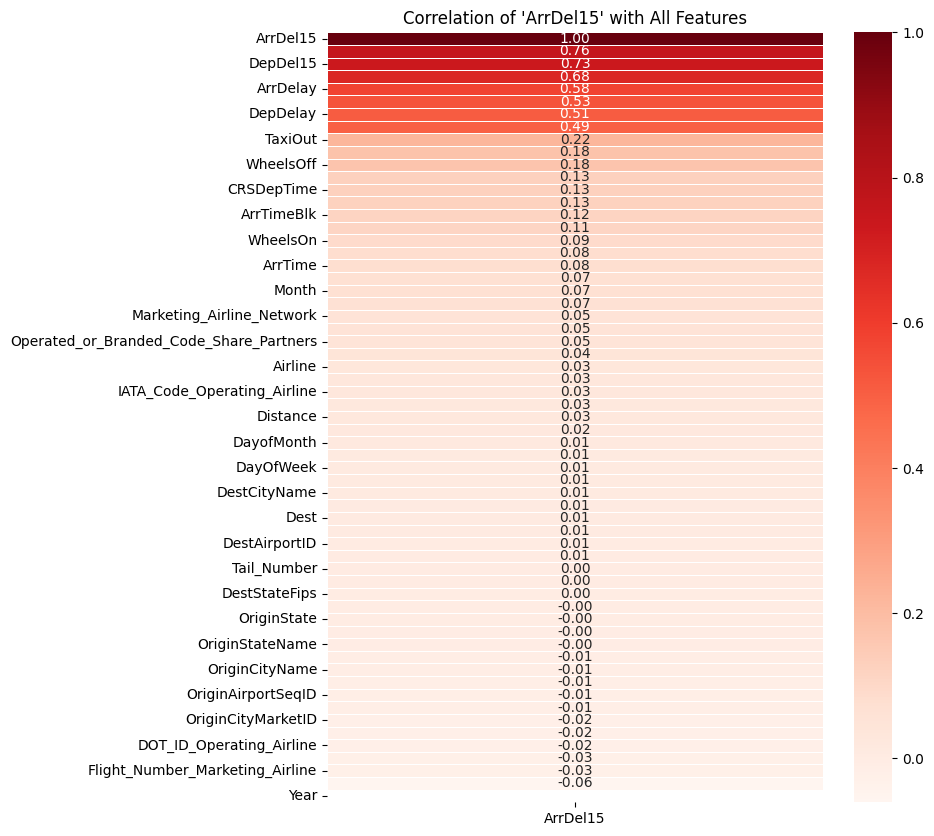

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Identify categorical and numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Compute correlation of 'ArrDel15' with all columns
delayed_correlation = df.corr()[["ArrDel15"]].sort_values(by="ArrDel15", ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(delayed_correlation, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)

plt.title("Correlation of 'ArrDel15' with All Features")
plt.show()

